# Access zipped TIF files from Zenodo via preload method

This notebook shows an example how to preload compressed files published on the [https://zenodo.org](https://zenodo.org) webpage. The compressed files will be downloaded, unpacked and the individual files will be stored in a cache data store, which can be subsequently accessed as usual. 

### Setup
In order to run this notebook, you need to install [`xcube_zenodo`](https://github.com/xcube-dev/xcube-zenodo), following the [README](../README.md).

Note that [`xcube_zenodo`](https://github.com/xcube-dev/xcube-zenodo) is a plugin of [`xcube`](https://xcube.readthedocs.io/en/latest/), where `xcube` is included in the `environment.yml`.  

Now, we first import everything we need:

In [1]:
%%time
from xcube.core.store import new_data_store
from xcube.core.store import get_data_store_params_schema

CPU times: user 3.01 s, sys: 264 ms, total: 3.27 s
Wall time: 1.48 s


First, we get the store parameters needed to initialize a zenodo [data store](https://xcube.readthedocs.io/en/latest/dataaccess.html#data-store-framework). 

In [2]:
%%time
store_params = get_data_store_params_schema("zenodo")
store_params

CPU times: user 38 ms, sys: 12 ms, total: 50 ms
Wall time: 49 ms


We initiate a zenodo [data store](https://xcube.readthedocs.io/en/latest/dataaccess.html#data-store-framework) for the record https://zenodo.org/records/13333034 with the record ID `root="13333034"`. Note that the `xcube-zenodo` plugin is recognized after installation by setting the first argument to `"zenodo"` in the `new_data_store` function. We can optionally specify the cache data store's ID and parameters using the `cache_store_id` and `cache_store_params` keyword arguments. By default, `cache_store_id` is set to `file`, and `cache_store_params` defaults to `dict(root="zenodo_cache/13333034", max_depth=10)`.

In [3]:
%%time
store = new_data_store("zenodo", root="13333034")

CPU times: user 7.43 ms, sys: 0 ns, total: 7.43 ms
Wall time: 7.1 ms


We can list the data IDs, which already tell us that we need to preload the data, since the available files in the records are all zip files. If the user tries to use `open_data()` to access a compressed data source, the store will raise an error and notify the user that `preload_data()` may be used.  

In [4]:
%%time
store.list_data_ids()

CPU times: user 5.18 ms, sys: 1.91 ms, total: 7.08 ms
Wall time: 354 ms


['italy.zip',
 'luxembourg.zip',
 'andorra.zip',
 'switzerland.zip',
 'albania.zip',
 'denmark.zip',
 'finland.zip',
 'slovakia.zip',
 'germany.zip',
 'bosniaherzegovina.zip',
 'belgium.zip',
 'bulgaria.zip',
 'croatia.zip',
 'liechtenstein.zip',
 'czechia.zip',
 'spain.zip',
 'slovenia.zip',
 'austria.zip',
 'latvia.zip',
 'portugal.zip',
 'poland.zip',
 'france.zip',
 'ireland.zip',
 'romania.zip',
 'serbia.zip',
 'hungary.zip',
 'norway.zip',
 'netherlands.zip',
 'unitedkingdom.zip',
 'macedonia.zip',
 'greece.zip',
 'lithuania.zip',
 'moldova.zip',
 'montenegro.zip',
 'estonia.zip',
 'ukraine.zip',
 'belarus.zip',
 'sweden.zip']

When trying to open a compressed file, the store will tell you that the data needs to be preloaded, since the data can not be fetched lazily. 

In [5]:
store.open_data("andorra.zip")

DataStoreError: The dataset andorra.zip is stored in a compressed format. Please use store.preload_data('andorra.zip') first.

Compressed files can be preloaded using the `preload_data` method. This approach enables the downloading of compressed files that cannot be lazily loaded, allowing them to be stored and readily available for the duration of the project. Also this method uses `preload_params`, which can be viewed in the next cell.

In [6]:
%%time
preload_params = store.get_preload_data_params_schema()
preload_params

CPU times: user 79 μs, sys: 10 μs, total: 89 μs
Wall time: 93 μs


The `preload_data` method returns a store which may be used subsequently to access the preloaded data, as shown in the subsequent cells. If no data IDs are given, all available data in compressed format will be preloaded. Note that the `preload_method` is new and highly experimental. Here is one example which reformats the each dataset to a `target_format` with a given chunksize. 

In [7]:
cache_store = store.preload_data("andorra.zip", "liechtenstein.zip", target_format="zarr", chunks=(-1, -1))

Data ID,Status,Progress,Message,Exception
andorra.zip,COMPLETED,100%,Preload finished,-
liechtenstein.zip,COMPLETED,100%,Preload finished,-


The data IDs can be view by listing the data IDs of the cache store, which is returned by the `preload_data` method. Note that in this example the zipped file contains multiple files. Each file is written to a Zarr file and the data ID is extended by the individual file names where the file extension is adjusted. 

In [8]:
cache_store.list_data_ids()

['liechtenstein/disturbance_agent_1985_2023_liechtenstein.zarr',
 'liechtenstein/number_disturbances_liechtenstein.zarr',
 'liechtenstein/latest_disturbance_liechtenstein.zarr',
 'liechtenstein/disturbance_probability_1985_2023_liechtenstein.zarr',
 'liechtenstein/annual_disturbances_1985_2023_liechtenstein.zarr',
 'liechtenstein/greatest_disturbance_liechtenstein.zarr',
 'liechtenstein/disturbance_agent_aggregated_liechtenstein.zarr',
 'liechtenstein/forest_mask_liechtenstein.zarr',
 'liechtenstein/disturbance_severity_1985_2023_liechtenstein.zarr',
 'andorra/disturbance_severity_1985_2023_andorra.zarr',
 'andorra/number_disturbances_andorra.zarr',
 'andorra/disturbance_agent_1985_2023_andorra.zarr',
 'andorra/annual_disturbances_1985_2023_andorra.zarr',
 'andorra/latest_disturbance_andorra.zarr',
 'andorra/disturbance_probability_1985_2023_andorra.zarr',
 'andorra/disturbance_agent_aggregated_andorra.zarr',
 'andorra/forest_mask_andorra.zarr',
 'andorra/greatest_disturbance_andorra.z

Next we want to open one of the datasets. We first view the availbale parameters to open the data. 

In [9]:
%%time
open_params = cache_store.get_open_data_params_schema(data_id="andorra/disturbance_probability_1985_2023_andorra.zarr")
open_params

CPU times: user 1.01 ms, sys: 2 μs, total: 1.01 ms
Wall time: 1.02 ms


In the original TIFF file, each data variable has `scale` and `offset` attributes. When the file is converted to Zarr, these attributes are preserved and stored in the variable encodings. The underlying data remains in `uint8`. However, when the Zarr dataset is opened, xarray automatically applies the scale and offset on the fly, so the data appears as `float64`. By setting `mask_and_scale=False`, this automatic transformation is disabled, as shown below.

In [10]:
%%time
ds = cache_store.open_data(
    "andorra/disturbance_probability_1985_2023_andorra.zarr",
    mask_and_scale=False
)
ds

CPU times: user 71.7 ms, sys: 936 μs, total: 72.6 ms
Wall time: 71.9 ms


<xarray.Dataset> Size: 44MB
Dimensions:      (y: 971, x: 1149)
Coordinates:
  * x            (x) float64 9kB 3.613e+06 3.613e+06 ... 3.647e+06 3.647e+06
  * y            (y) float64 8kB 2.214e+06 2.214e+06 ... 2.185e+06 2.185e+06
Data variables: (12/40)
    band_1       (y, x) uint8 1MB dask.array<chunksize=(971, 1149), meta=np.ndarray>
    band_10      (y, x) uint8 1MB dask.array<chunksize=(971, 1149), meta=np.ndarray>
    band_11      (y, x) uint8 1MB dask.array<chunksize=(971, 1149), meta=np.ndarray>
    band_12      (y, x) uint8 1MB dask.array<chunksize=(971, 1149), meta=np.ndarray>
    band_13      (y, x) uint8 1MB dask.array<chunksize=(971, 1149), meta=np.ndarray>
    band_14      (y, x) uint8 1MB dask.array<chunksize=(971, 1149), meta=np.ndarray>
    ...           ...
    band_5       (y, x) uint8 1MB dask.array<chunksize=(971, 1149), meta=np.ndarray>
    band_6       (y, x) uint8 1MB dask.array<chunksize=(971, 1149), meta=np.ndarray>
    band_7       (y, x) uint8 1MB dask.array<chunksize=(971, 1149), meta=np.ndarray>
    band_8       (y, x) uint8 1MB dask.array<chunksize=(971, 1149), meta=np.ndarray>
    band_9       (y, x) uint8 1MB dask.array<chunksize=(971, 1149), meta=np.ndarray>
    spatial_ref  int64 8B ...
Attributes:
    AREA_OR_POINT:  Area

We plot parts of the opened data as an example below.

CPU times: user 398 ms, sys: 40.6 ms, total: 439 ms
Wall time: 1.01 s


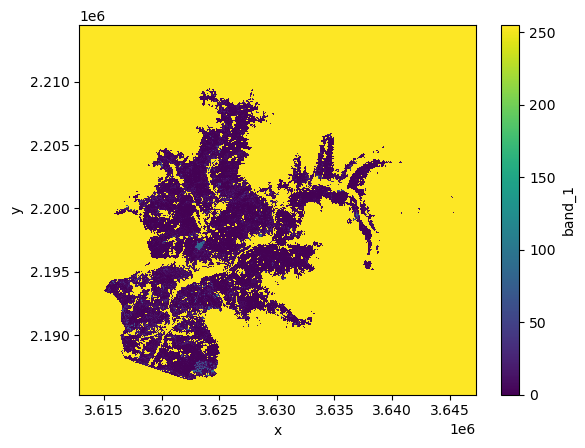

In [11]:
%%time
ds.band_1.plot()